<div style="text-align:center">
    <h1>
        SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    In this notebook we are going to implement a method that learns from experience and uses bootstrapping.
    It is known as SARSA because of the elements involved in the update rule:
</div>

\begin{equation}
\text{State}_t, \text{Action}_t, \text{Reward}_t, \text{State}_{t+1}, \text{Action}_{t+1}
\end{equation}

<br>

<div style="text-align:center">
    This method follows an on-policy strategy, in which the same policy that is optimized is responsible for scanning the environment.
</div>


<br>



<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 5 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [26]:
env = Maze()

#### Create the $Q(s, a)$ table

In [49]:
action_values = np.zeros((5,5,4))

#### Create the policy $\pi(s)$

In [50]:
def policy(state, epsilon=.2):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

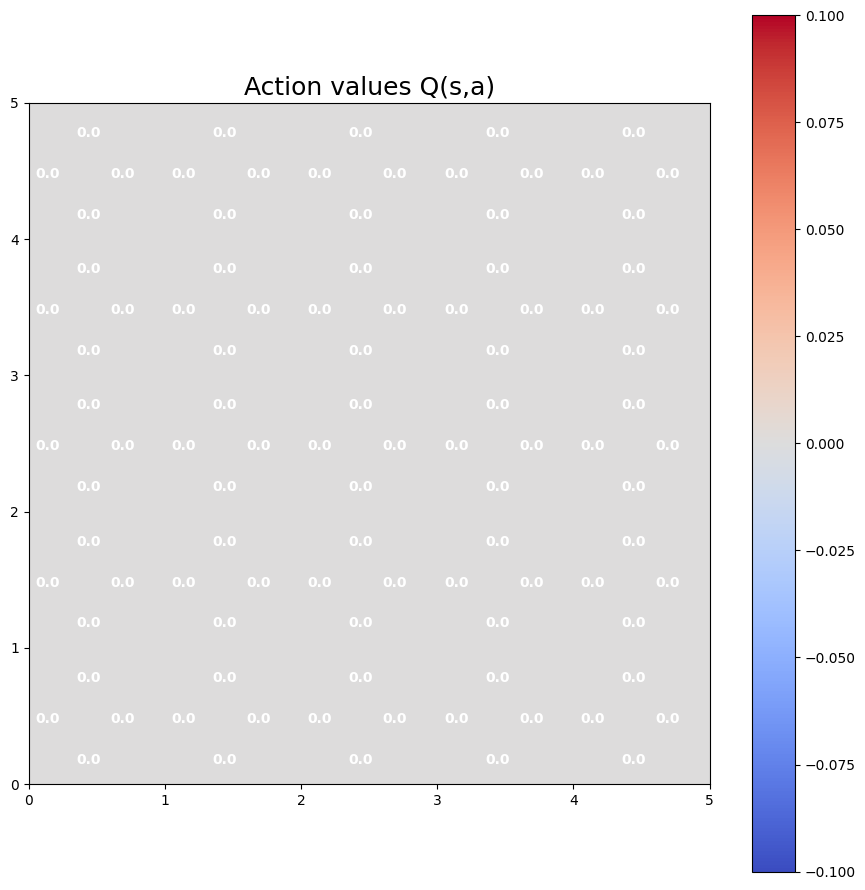

In [51]:
plot_action_values(action_values)

#### Plot the policy

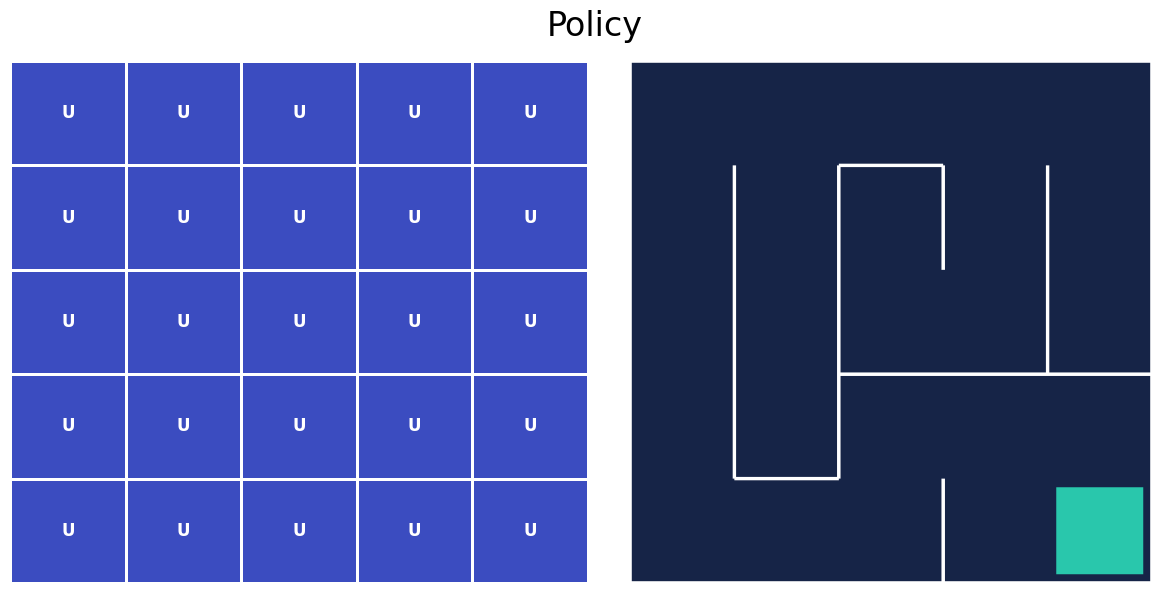

In [52]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

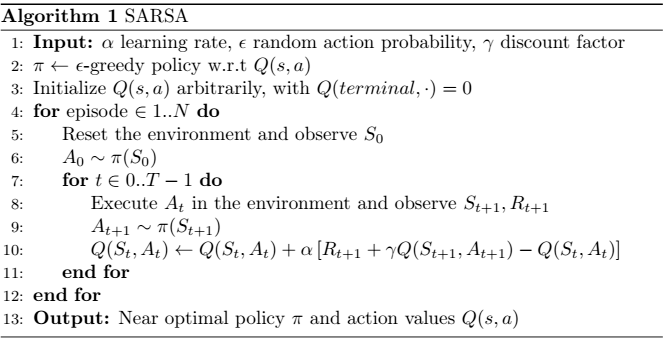

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [53]:
def sarsa(action_values, policy, episodes=10000, alpha=.1, epsilon=.2, gamma=.99):

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        action = policy(state, epsilon)

        i = 1
        while not done:
            next_state, reward, done, _ = env.step(action) # we won't be appending this results into trajectory cos we will be boostrapping instead!

            # sample next action for bootstrapping the next state's value
            next_action = policy(next_state, epsilon)
            current_qsa = action_values[state][action]
            bootstrapped = action_values[next_state][next_action]
            td_error = reward + gamma*bootstrapped - current_qsa
            action_values[state][action] = current_qsa + alpha * td_error

            # take the sampled action for the next step
            state = next_state
            action = next_action

            i+=1
        print('Episode:', episode, ' took ', i, "steps")


In [54]:
sarsa(action_values, policy, episodes=10000)

Episode: 1  took  315 steps
Episode: 2  took  227 steps
Episode: 3  took  436 steps
Episode: 4  took  301 steps
Episode: 5  took  58 steps
Episode: 6  took  233 steps
Episode: 7  took  368 steps
Episode: 8  took  33 steps
Episode: 9  took  73 steps
Episode: 10  took  337 steps
Episode: 11  took  68 steps
Episode: 12  took  54 steps
Episode: 13  took  404 steps
Episode: 14  took  53 steps
Episode: 15  took  277 steps
Episode: 16  took  52 steps
Episode: 17  took  98 steps
Episode: 18  took  96 steps
Episode: 19  took  111 steps
Episode: 20  took  30 steps
Episode: 21  took  179 steps
Episode: 22  took  34 steps
Episode: 23  took  264 steps
Episode: 24  took  62 steps
Episode: 25  took  41 steps
Episode: 26  took  166 steps
Episode: 27  took  144 steps
Episode: 28  took  37 steps
Episode: 29  took  157 steps
Episode: 30  took  22 steps
Episode: 31  took  62 steps
Episode: 32  took  32 steps
Episode: 33  took  118 steps
Episode: 34  took  21 steps
Episode: 35  took  22 steps
Episode: 36  

## Show results

#### Show resulting value table $Q(s,a)$

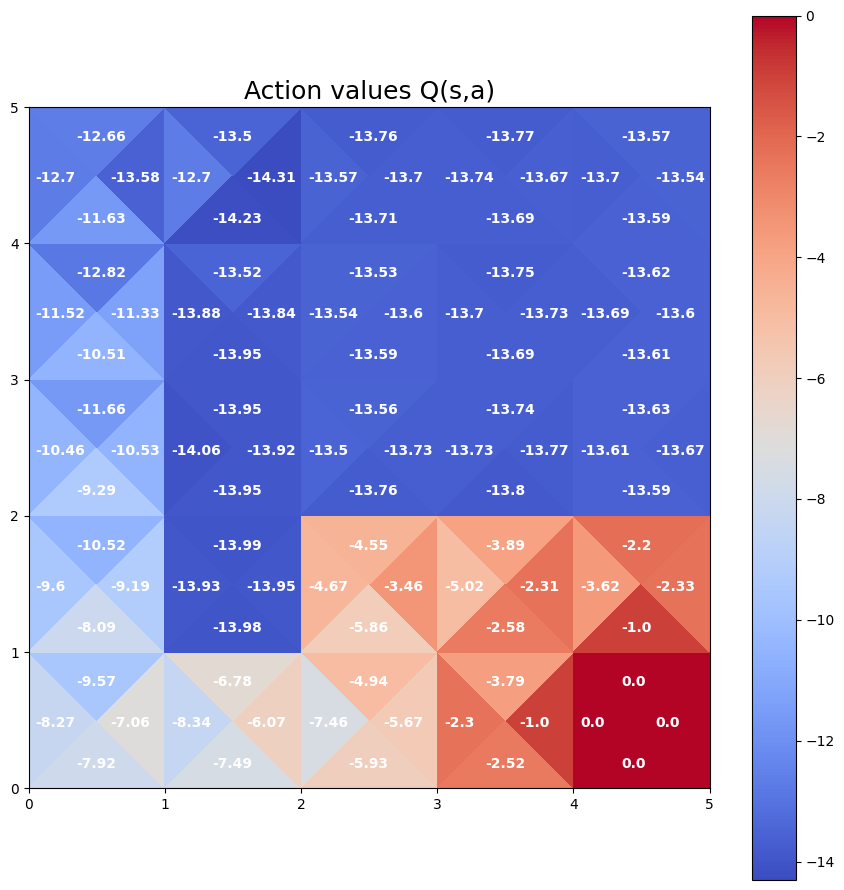

In [55]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

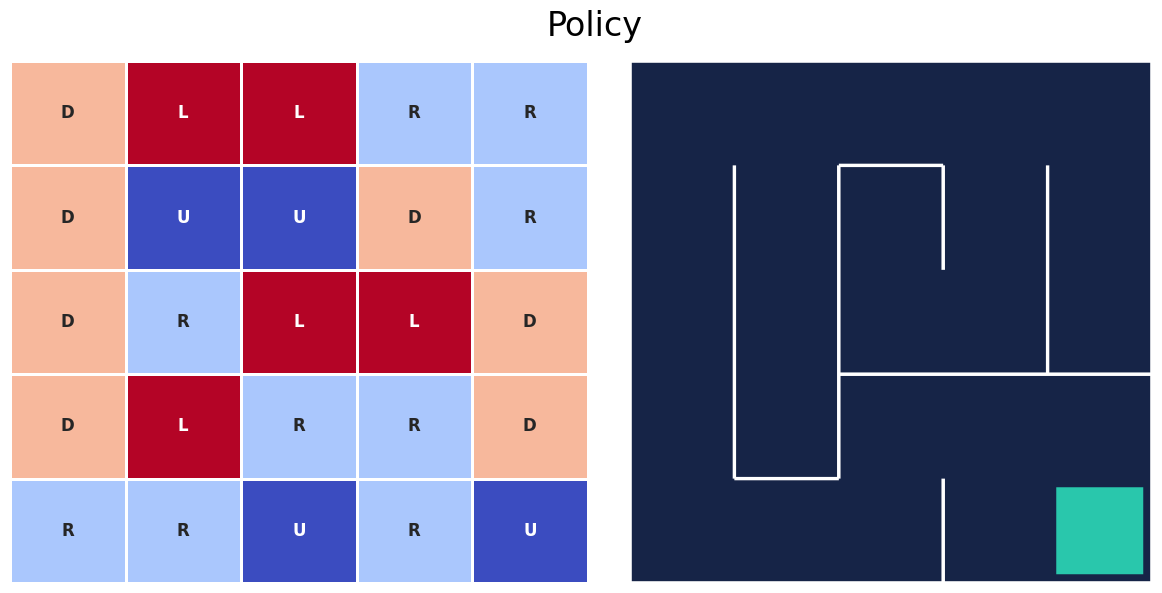

In [56]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

In [ ]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 6: Temporal difference learning](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)